In [2]:
import time
import threading
import matplotlib.pyplot as plt
%matplotlib inline
import random
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [3]:
class Philosopher(threading.Thread):
    def __init__(self, name, both_forks):
        """
        both_forks = [1, 2]
        """
        super().__init__()
        self.name = name
        self.both_forks = both_forks #食事に必要なフォーク番号
        self.hold_forks = [] #現時点で持っているフォーク番号
        self.state = 0 
        self.time_series = {} #{state: time, }
        """
        self.state: 現在の状況
        0: hold noting(hungry)   
        1:pickup1, 
        2:pickup2(eating), 
        3:puts1, 
        4:puts2(thinking)
        """
        
    def do_fork(self, Forks):
        if self.state == 0:
            #######はじめにどちらのフォークを持つか##########
#             wait_fork = random.choice(self.both_forks) #ランダム
            wait_fork = self.both_forks[0] #左から取る
#             wait_fork = self.both_forks[1] #右から取る
            ###################################
        
            end_time = get_forks(wait_fork, Forks, self.hold_forks, self.name)
            self.state = 1

            return end_time
            
        elif self.state == 1:
            wait_fork = list(set(self.both_forks) - set(self.hold_forks))[0]

            end_time = get_forks(wait_fork, Forks, self.hold_forks, self.name)
            self.state = 2
            return end_time
            
        elif self.state == 2:
            #######始めにどちらのフォークを置くか##########
#             put_fork = random.choice(self.hold_forks) #ランダム
#             put_fork = self.both_forks[0] #左から置く
            put_fork = self.both_forks[1] #右から置く
            ###################################
            
            put_forks(put_fork, Forks, self.hold_forks, self.name)
            self.state = 3
            event.set()
            
        elif self.state == 3: #食事終了
            put_fork = self.hold_forks[0]
            put_forks(put_fork, Forks, self.hold_forks, self.name)
            event.set()
            self.state = 4
            
        
    def action(self, Forks, ss_time):
        
        for i in range(30):
            
            #self.state == 0:
            t = random.random() / 1000
            print("trial {}: {} stays hungry for {:.3f}msec.\n".format(i, self.name, t*1000))
            wait_time(t)
            self.time_series[str(i)+":hungry"]= time.time() - ss_time
            
            self.time_series[str(i)+":fork1"]= self.do_fork(Forks) - ss_time #fork1: フォーク1を持った時間
            t = random.random() / 1000
            wait_time(t)
            
            #self.state == 1:
            self.time_series[str(i)+":fork2"]= self.do_fork(Forks) - ss_time #"fork2":フォーク2を持った時間
            t = random.random() / 1000
            wait_time(t)
            
            #self.state == 2:
            t = random.random()  / 1000
            print("{} starts eating for {:.3f}msec.\n".format(self.name, t*1000))
            wait_time(t)
            self.time_series[str(i)+":eating"]= time.time() - ss_time
            self.do_fork(Forks) #フォークを置く(1st)
            t = random.random() / 1000
            wait_time(t)
            
            #self.state == 3:
            self.do_fork(Forks) #フォークを置く(2nd)
            t = random.random() / 1000
            wait_time(t)
            
            #self.state == 4:
            t = random.random()  / 1000
            print("{} starts thinking for {:.3f}msec.\n".format(self.name, t*1000))
            wait_time(t)
            self.time_series[str(i)+":thinking"]= time.time() - ss_time
            self.state = 0
            
            

In [4]:
def wait_time(t):
    
    time.sleep(t)

In [5]:
def put_forks(fork_num, Forks_class, hold_forks, name):
    Forks_class.change_state(fork_num)
    print("{} puts {}.".format(name,fork_num))
    hold_forks.remove(fork_num)
    event.set()

In [6]:
def get_forks(fork_num, Forks_class, hold_forks, name):
    start_time = time.time()
    state = True
    while not Forks_class.get_fork_state(fork_num):
        event.wait()
    end_time = time.time()

        
    Forks_class.change_state(fork_num) #使用中に変更
    hold_forks.append(fork_num)
    need_time = end_time - start_time
    print("{} picks up {}. It takes {:.3f}msec.\n".format(name, fork_num, need_time*1000))
    return end_time

In [7]:
class Forks:
    def __init__(self, forks_num):
        self.fork_num_dic = {}
        for i in range(forks_num):
            self.fork_num_dic[i] = True
        
    def get_fork_state(self, fork_num):
        return self.fork_num_dic[fork_num] #True：空き、False:使用中
    
    def change_state(self, fork_num):
        if self.fork_num_dic[fork_num]: #TrueならFlaseへ
            self.fork_num_dic[fork_num] = False
        else:
            self.fork_num_dic[fork_num] = True
        

In [8]:
threading.enumerate()

[<_MainThread(MainThread, started 8671616512)>,
 <Thread(Thread-2, started daemon 13077671936)>,
 <Heartbeat(Thread-3, started daemon 13094461440)>,
 <HistorySavingThread(IPythonHistorySavingThread, started 13112324096)>,
 <ParentPollerUnix(Thread-1, started daemon 13129674752)>]

In [22]:

fork = Forks(5)
phi_a = Philosopher("a", [0, 1])
phi_b = Philosopher("b", [1, 2])
phi_c = Philosopher("c", [2, 3])
phi_d = Philosopher("d", [3, 4])
phi_e = Philosopher("e", [4, 1])

In [23]:
event = threading.Event()


In [24]:
start_time = time.time()
random.seed(0)
thread_a = threading.Thread(target= phi_a.action, args=(fork, start_time))
thread_b = threading.Thread(target= phi_b.action, args=(fork, start_time))
thread_c = threading.Thread(target= phi_c.action, args=(fork, start_time))
thread_d = threading.Thread(target= phi_d.action, args=(fork, start_time))
thread_e = threading.Thread(target= phi_e.action, args=(fork, start_time))

thread_a.start()
thread_b.start()
thread_c.start()
thread_d.start()
thread_e.start()

thread_a.join(5)
thread_b.join(5)
thread_c.join(5)
thread_d.join(5)
thread_e.join(5)

end_time = time.time()


for phi in [phi_a, phi_b, phi_c, phi_d, phi_e]:
    if phi.state == 1:
        phi.time_series["end:fork1"] = end_time - start_time
        
    else:
        phi.time_series["end"] = end_time - start_time
    

trial 0: a stays hungry for 0.844msec.

trial 0: b stays hungry for 0.758msec.

trial 0: c stays hungry for 0.421msec.
a picks up 0. It takes 0.006msec.

b picks up 1. It takes 0.002msec.

trial 0: d stays hungry for 0.511msec.

c picks up 2. It takes 0.002msec.


trial 0: e stays hungry for 0.303msec.

c picks up 3. It takes 0.002msec.

e picks up 4. It takes 0.001msec.

c starts eating for 0.908msec.

c puts 3.
c puts 2.
d picks up 3. It takes 8.349msec.

b picks up 2. It takes 12.560msec.

c starts thinking for 0.251msec.

trial 1: c stays hungry for 0.910msec.

b starts eating for 0.983msec.

b puts 2.
c picks up 2. It takes 0.830msec.

b puts 1.e picks up 1. It takes 14.999msec.


e starts eating for 0.730msec.

e puts 1.
a picks up 1. It takes 19.573msec.

b starts thinking for 0.472msec.

e puts 4.
trial 1: b stays hungry for 0.434msec.
a starts eating for 0.611msec.


a puts 1.
d picks up 4. It takes 10.786msec.

b picks up 1. It takes 0.877msec.

a puts 0.
e starts thinking fo

In [25]:
for phi in [phi_a, phi_b, phi_c, phi_d, phi_e]:
    phi.time_series.pop("end:fork1")

In [26]:
all_times = []

for phi in [phi_a, phi_b, phi_c, phi_d, phi_e]:
    if phi.state == 1:
        phi.time_series["end:fork2"] = end_time - start_time
        
    else:
        phi.time_series["end"] = end_time - start_time
        
    all_times.append(phi.time_series)
    
index = ["a", "b", "c", "d", "e"]

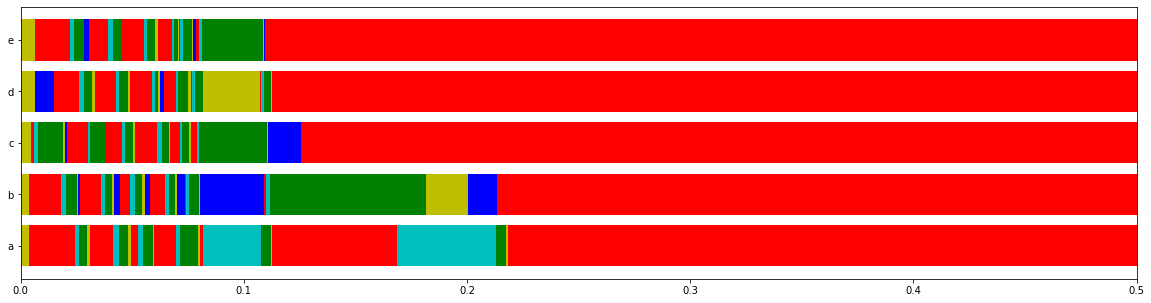

In [27]:
fig, ax = plt.subplots(figsize=(20, 5))
phi_num = len(all_times)
left_data = np.zeros(phi_num)

label_color = {"hungry": 'y', "fork1":'b', "fork2":'r', "eating":'c', "thinking":'g', "end":"k"}


time_series = all_times[np.array([len(ts) for ts in all_times]).argmax()]

for key, value in time_series.items():
    label = key.split(":")[-1]
#     print(label)
    
    try:
        times = []
        for i in range(phi_num):
            times.append(all_times[i][key])
        times = np.array(times)     
        

    except KeyError:
        times = []
        for i in range(phi_num):
            if key in all_times[i]:
                times.append(all_times[i][key])
            else:
                times.append(left_data[i])
        times = np.array(times)
       
    draw_times = times- left_data
    bar_list = ax.barh(index, draw_times, left=left_data, label=label, color = label_color[label])
    left_data =  times                 

    ax.set_xlim([0, 0.5])

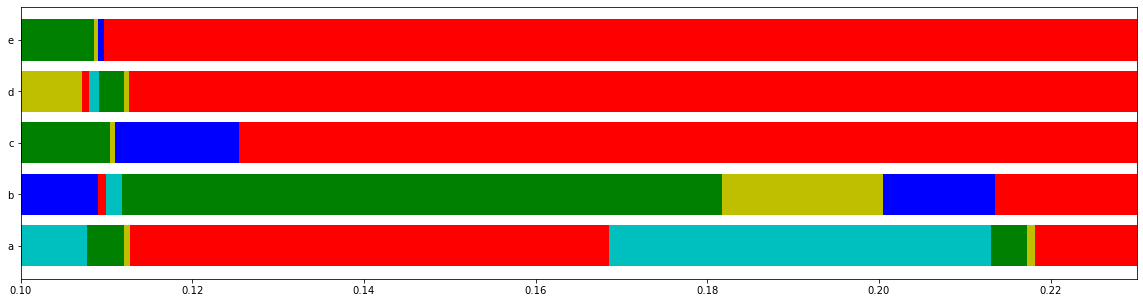

In [28]:
#deadlockが起きる前後を拡大
fig, ax = plt.subplots(figsize=(20, 5))
phi_num = len(all_times)
left_data = np.zeros(phi_num)

label_color = {"hungry": 'y', "fork1":'b', "fork2":'r', "eating":'c', "thinking":'g', "end":"k"}


time_series = all_times[np.array([len(ts) for ts in all_times]).argmax()]

for key, value in time_series.items():
    label = key.split(":")[-1]
#     print(label)
    
    try:
        times = []
        for i in range(phi_num):
            times.append(all_times[i][key])
        times = np.array(times)     
        

    except KeyError:
        times = []
        for i in range(phi_num):
            if key in all_times[i]:
                times.append(all_times[i][key])
            else:
                times.append(left_data[i])
        times = np.array(times)
       
    draw_times = times- left_data
    bar_list = ax.barh(index, draw_times, left=left_data, label=label, color = label_color[label])
    left_data =  times                 

    ax.set_xlim([0.1, 0.23])

deadlockがE→D→C→B→Aの順に起こっている。

deadlockの改善策としては、フォークを左右のどちらから持つのか、また左右のどちらから置くのかをランダムにする、または、左から動作する人と右から動作する人を混在させれば良い。